## 1. 단순 회귀분석

In [1]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
y = [17, 24, 62, 49, 52, 105, 130, 125]

import numpy as np
A = np.column_stack((X, np.ones((8))))
B = np.array(y)

A

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [2]:
np.linalg.inv(A.T @ A) @ A.T @ B

array([  0.87962664, -27.35846347])

In [3]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')
print(f'p_value: {p_value}')
print(f'std_err: {std_err}')

slope: 0.8796266379465087
intercept: -27.3584634715491
r_value: 0.89008928103186
p_value: 0.003051790677096642
std_err: 0.18388671751663876


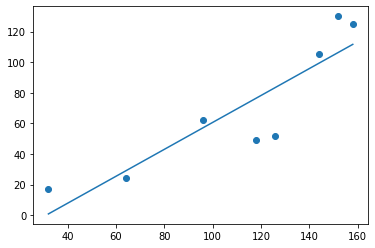

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.plot(X, slope*np.array(X) + intercept, '-')
plt.show()

In [5]:
fit = np.polyfit(X, y, 1)
fit
# 일차방정식의 경사 및 절편

array([  0.87962664, -27.35846347])

In [6]:
# 도출한 fit을 바탕으로 일차방정식 변환
func = np.poly1d(fit)
func(50)

16.6228684257764

In [7]:
# 이차방정식 생성
fit2 = np.polyfit(X, y, 2)
func2 = np.poly1d(fit2)

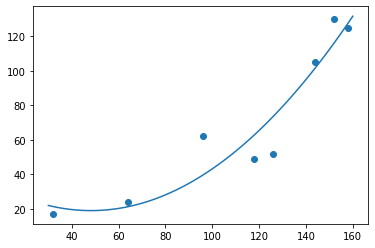

In [8]:
plt.scatter(X, y)
sample_X = np.linspace(30, 160, 100)
plt.plot(sample_X, func2(sample_X), '-')
plt.show()

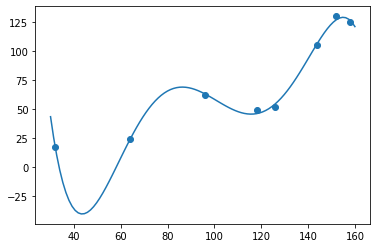

In [14]:
def draw_polyfit(X, y, deg=1):
    fit = np.polyfit(X, y, deg)
    func = np.poly1d(fit)
    plt.scatter(X, y)
    x_sample = np.linspace(30, 160, 100)
    plt.plot(x_sample, func(x_sample))
    plt.show()

draw_polyfit(X, y, 5)

## 2. 포뮬러를 이용한 회귀식

In [15]:
import pandas as pd

df = pd.DataFrame(np.c_[X, y], columns=['X', 'y'])
df

,X,y
0,32,17
1,64,24
2,96,62
3,118,49
4,126,52
5,144,105
6,152,130
7,158,125


In [17]:
# 포뮬러 라이브러리를 이용한 일반 선형회귀식 도출
# 절편, 기울기 도출
from statsmodels.formula.api import ols
model = ols('y ~ X', data=df)
res = model.fit()
res.params

Intercept   -27.358463
X             0.879627
dtype: float64

In [19]:
import statsmodels.api as sm
model = sm.OLS.from_formula('y ~ X', data=df)
res = model.fit()
res.params

Intercept   -27.358463
X             0.879627
dtype: float64

In [20]:
# 상수항을 포함하지 않는 3차방정식의 선형회귀식
model2 = ols('y ~ X + I(X**2) + I(X**3) -1', data=df)
res2 = model2.fit()
res2.params

X            1.005637
I(X ** 2)   -0.013981
I(X ** 3)    0.000082
dtype: float64

In [21]:
pred = res2.predict(df.X)
pred

0     20.546081
1     28.554576
2     40.121998
3     58.503665
4     68.513031
5     99.357248
6    117.343957
7    132.781779
dtype: float64

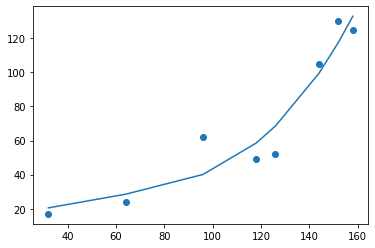

In [22]:
plt.scatter(X, y)
plt.plot(X, pred)
plt.show()

## 3. 정규화 선형회귀